# Linear Classifier

Please read this article to gain more information about the relationships between AI, Machine Learning, Neural Networks, Deep Learning

https://www.ibm.com/cloud/blog/ai-vs-machine-learning-vs-deep-learning-vs-neural-networks


Lets start with a simple linear classifier Perceptron.
https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html

## Generating Some Linear Separable Data

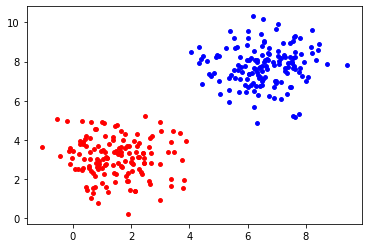

In [2]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import numpy as np
numSamples = 300
samples,labels = make_blobs(n_samples=numSamples, 
                             centers=([1.5, 3], [6.7, 7.9]), 
                             random_state=0)
colours = ('red', 'blue')
fig, ax = plt.subplots()
for n_class in range(2):
    ax.scatter(samples[labels==n_class][:, 0], samples[labels==n_class][:, 1], 
               c=colours[n_class], s=15)

# Python Vectorization
Take a look at this cool post

http://www.geeksforgeeks.org/vectorization-in-python/


In [6]:
%%time
n_class = 1
labels==n_class;

Wall time: 0 ns


array([False, False,  True, False, False, False,  True,  True, False,
       False,  True, False, False,  True, False,  True,  True,  True,
        True,  True, False, False, False, False,  True, False,  True,
       False,  True, False,  True,  True, False,  True,  True, False,
       False,  True, False, False, False, False,  True, False,  True,
        True,  True,  True,  True, False, False, False,  True, False,
        True, False,  True, False,  True, False,  True, False, False,
        True,  True,  True,  True, False, False, False, False,  True,
       False, False,  True,  True,  True, False, False,  True,  True,
       False,  True,  True,  True, False, False, False,  True, False,
        True, False,  True, False,  True, False,  True,  True, False,
        True, False, False,  True, False, False,  True, False,  True,
       False,  True, False,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True, False,  True,  True, False, False,
       False,  True,

In [7]:
%%time
idx = np.empty(len(labels), dtype=bool)
for i in range(1,len(labels)):
    if (labels[i]==1):
        idx[i] = 'True'
print(idx)

[False False  True False False False  True  True False False  True False
 False  True False  True  True  True  True  True False False False False
  True False  True False  True False  True  True False  True  True False
 False  True False False False False  True False  True  True  True  True
  True False False False  True False  True False  True False  True False
  True False False  True  True  True  True False False False False  True
 False False  True  True  True False False  True  True False  True  True
  True False False False  True False  True False  True False  True False
  True  True False  True False False  True False False  True False  True
 False  True False  True  True  True False  True  True  True  True  True
  True False  True  True False False False  True  True  True False  True
  True  True False  True False  True  True False  True  True  True False
  True False False  True  True  True False False False False False False
  True False False False False  True False False  T

# Perceptron
Learn it by Perceptron

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Perceptron.html


[5.22948638 2.16720847]
1.0
1.0


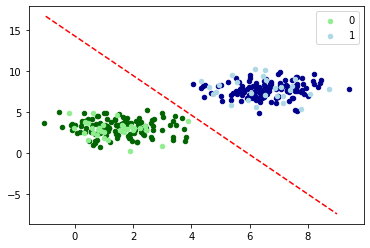

In [15]:
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
import numpy as np
trainData, testData, trainLabels,testLabels = train_test_split(samples , labels , test_size = 0.2, random_state=0)
clf = Perceptron(tol=1e-1, max_iter = 3000, early_stopping= True)
clf.fit(trainData,trainLabels)
clf.predict(testData)
colours = ('darkgreen', 'darkblue')
fig, ax = plt.subplots()
for n_class in range(2):
    ax.scatter(trainData[trainLabels==n_class][:, 0], trainData[trainLabels==n_class][:, 1],c=colours[n_class],s=20)
colours = ('lightgreen', 'lightblue')
for n_class in range(2):
    ax.scatter(testData[testLabels==n_class][:, 0], testData[testLabels==n_class][:, 1], 
               c=colours[n_class], s=20, label=str(n_class))
w = clf.coef_[0]
print(w)
a = -w[0] / w[1]
xx = np.linspace(-1,9)
# print(xx)
yy = a * xx - (clf.intercept_[0]) / w[1]
plt.plot(xx, yy, '--', color='red')
print(clf.score(trainData,trainLabels))
print(clf.score(testData,testLabels))
plt.legend()

https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html
https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_circles.html

# Generating non-linearly separable data

0.95
[ 1.62151063 -3.57681328]


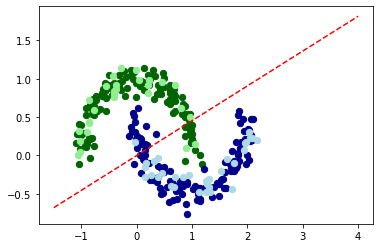

In [5]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_moons,make_circles
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

samples, labels = make_moons(n_samples=300, noise=0.1)
# samples, labels = make_circles(n_samples=300, noise=0.05)
trainData, testData, trainLabels,testLabels = train_test_split(samples , labels , test_size = 0.2)
clf = Perceptron(tol=1e-3)
clf.fit(trainData,trainLabels)
clf.predict(testData)
print(clf.score(testData,testLabels))
# scatter plot, dots colored by class value

colours = ('darkgreen', 'darkblue')
fig, ax = plt.subplots()
for n_class in range(2):
    ax.scatter(trainData[trainLabels==n_class][:, 0], trainData[trainLabels==n_class][:, 1], 
               c=colours[n_class], s=40, label=str(n_class))
colours = ('lightgreen', 'lightblue')
for n_class in range(2):
    ax.scatter(testData[testLabels==n_class][:, 0], testData[testLabels==n_class][:, 1], 
               c=colours[n_class], s=40, label=str(n_class))
# fig, ax = plt.subplots()
w = clf.coef_[0]
print(w)
a = -w[0] / w[1]
xx = np.linspace(-1.5, 4)
yy = a * xx - (clf.intercept_[0]) / w[1]
plt.plot(xx, yy, '--', color='red')

# Multi-layer non-linear neural network

Code is based on: https://scikit-learn.org/stable/auto_examples/neural_networks/plot_mlp_alpha.html#sphx-glr-auto-examples-neural-networks-plot-mlp-alpha-py

A notebook about Stochastic Gradient Descent (SGD): 
https://github.com/tirthajyoti/Machine-Learning-with-Python/blob/master/Classification/Stochastic_grad_descent.ipynb

0.9833333333333333
(330,)
(15, 22)


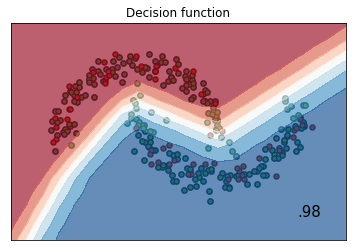

In [6]:
#  solver: lbfgs, sgd(Stochiastic Gradient Descent) and Adam 
from sklearn.neural_network import MLPClassifier
from matplotlib.colors import ListedColormap
mlp = MLPClassifier(hidden_layer_sizes=(20), max_iter=2000, alpha=0.1,
                    solver='adam',
                    learning_rate_init=0.001, learning_rate='adaptive')
mlp.fit(trainData, trainLabels);
mlp.predict(testData)
print(mlp.score(testData,testLabels))

h=0.2 #step-size
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])
x_min, x_max = samples[:, 0].min() - .5, samples[:, 0].max() + .5
y_min, y_max = samples[:, 1].min() - .5, samples[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
print(xx.ravel().shape)
print(yy.shape)
fig, ax = plt.subplots()
ax.scatter(trainData[:, 0], trainData[:, 1])
    # and testing points
ax.scatter(testData[:, 0], testData[:, 1], cmap=cm_bright, alpha=0.6)
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
ax.set_xticks(())
ax.set_yticks(())
if hasattr(mlp, "decision_function"):
    Z = mlp.decision_function(np.c_[xx.ravel(), yy.ravel()])
else:
    Z = mlp.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

Z = Z.reshape(xx.shape)
# ax.contourf(xx, yy, Z, cmap=cm, alpha=.001)

        # Plot also the training points
ax.scatter(trainData[:, 0], trainData[:, 1],edgecolors='black', s=25)
ax.scatter(testData[:, 0], testData[:, 1], edgecolors='black', s=25)
name="Decision function"
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(name)
ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % mlp.score(testData,testLabels)).lstrip('0'),size=15, horizontalalignment='right')
Z = Z.reshape(xx.shape)
ax.contourf(xx, yy, Z, cmap=cm, alpha=0.67)
plt.show()

Hand-Written digits:
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits




<Figure size 432x288 with 0 Axes>

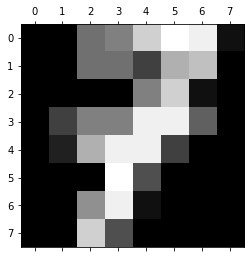

In [7]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing
import numpy as np

images = load_digits()
plt.gray()
plt.matshow(images.images[7])
plt.show()


# Experiment

Running experiment on number of neurons in the hidden layer and the value of regularization($\alpha$).

In [9]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
# from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing
import numpy as np

X_digits, y_digits = load_digits(return_X_y=True)
X_scaled = preprocessing.scale(X_digits)
trainData,testData,trainLabel,testLabel =train_test_split(X_scaled,y_digits,test_size=0.2)

# ======== Running Experiments on number of neurons in the hidden layer

clf_1 = MLPClassifier(hidden_layer_sizes=(3), max_iter=1300, alpha=1e-4,solver='sgd', learning_rate_init=.01)
clf_1.fit(trainData,trainLabel)
print(clf_1.score(trainData,trainLabel))
print("Accuracy of using 3 neurons in the hidden layer:%.4f"%clf_1.score(testData,testLabel))

clf_2 = MLPClassifier(hidden_layer_sizes=(7), max_iter=1300, alpha=1e-4,solver='sgd', learning_rate_init=.01)
clf_2.fit(trainData,trainLabel)
print(clf_2.score(trainData,trainLabel))
print("Accuracy of using 7 neurons in the hidden layer:%.4f"%clf_2.score(testData,testLabel))


clf_3 = MLPClassifier(hidden_layer_sizes=(13), max_iter=1300, alpha=1e-4,solver='sgd', learning_rate_init=.01)
clf_3.fit(trainData,trainLabel)
print(clf_3.score(trainData,trainLabel))
print("Accuracy of using 13 neurons in the hidden layer:%.4f"%clf_3.score(testData,testLabel))

clf_4 = MLPClassifier(hidden_layer_sizes=(21), max_iter=1300, alpha=1e-4,solver='sgd', learning_rate_init=.01)
clf_4.fit(trainData,trainLabel)
print(clf_4.score(trainData,trainLabel))
print("Accuracy of using 21 neurons in the hidden layer:%.4f"%clf_4.score(testData,testLabel))

# ============================== Running Experiments on alpha parameter
clf_5 = MLPClassifier(hidden_layer_sizes=(4),alpha=1,max_iter=1300,solver='sgd', learning_rate_init=.01)
clf_5.fit(trainData,trainLabel)
print(clf_5.score(trainData,trainLabel))
print("Accuracy of using alpha=1:%.4f"%clf_5.score(testData,testLabel))

clf_6 = MLPClassifier(hidden_layer_sizes=(4),alpha=1e-1,max_iter=1300,solver='sgd', learning_rate_init=.01)
clf_6.fit(trainData,trainLabel)
print(clf_6.score(trainData,trainLabel))
print("Accuracy of using alpha=0.1:%.4f"%clf_6.score(testData,testLabel))

clf_7 = MLPClassifier(hidden_layer_sizes=(4),alpha=1e-2,max_iter=1300,solver='sgd', learning_rate_init=.01)
clf_7.fit(trainData,trainLabel)
print(clf_7.score(trainData,trainLabel))
print("Accuracy of using alpha=0.01:%.4f"%clf_7.score(testData,testLabel))

clf_8 = MLPClassifier(hidden_layer_sizes=(4),alpha=1e-3,max_iter=1300,solver='sgd', learning_rate_init=.01)
clf_8.fit(trainData,trainLabel)
print(clf_8.score(trainData,trainLabel))
print("Accuracy of using alpha=0.001:%.4f"%clf_8.score(testData,testLabel))


# ============== Plotting in the next cell

0.8990953375086986
Accuracy of using 3 neurons in the hidden layer:0.8361
0.9944328462073765
Accuracy of using 7 neurons in the hidden layer:0.9389
0.9979123173277662
Accuracy of using 13 neurons in the hidden layer:0.9778
0.9986082115518441
Accuracy of using 21 neurons in the hidden layer:0.9778
0.9519832985386222
Accuracy of using alpha=1:0.9083
0.9679888656924147
Accuracy of using alpha=0.1:0.9056
0.9596381350034795
Accuracy of using alpha=0.01:0.8833
0.9498956158663883
Accuracy of using alpha=0.001:0.8806


# Visualization
Ploting results from above cell. Please, look at the following link to get more infoamtion:
https://matplotlib.org/devdocs/gallery/subplots_axes_and_figures/subplots_demo.html

https://matplotlib.org/tutorials/introductory/pyplot.html


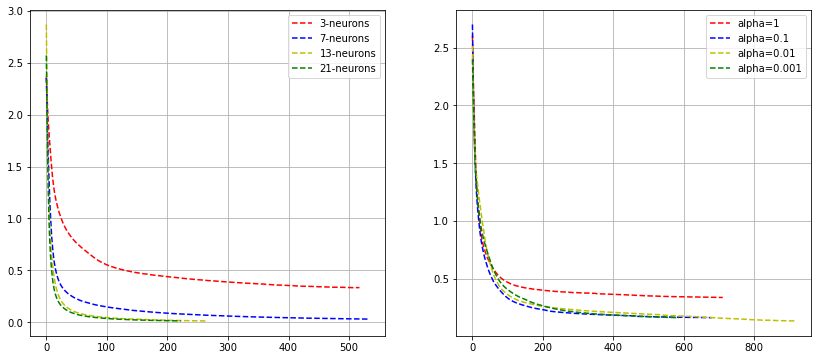

In [10]:
fig, axs = plt.subplots(1,2,figsize=(14,6))
axs[0].plot(clf_1.loss_curve_,'r--', label='3-neurons')
axs[0].plot(clf_2.loss_curve_,'b--',label='7-neurons')
axs[0].plot(clf_3.loss_curve_,'y--',label='13-neurons')
axs[0].plot(clf_4.loss_curve_,'g--',label='21-neurons')
axs[0].grid('True')
axs[0].legend()

axs[1].plot(clf_5.loss_curve_, 'r--' , label='alpha=1')
axs[1].plot(clf_6.loss_curve_, 'b--' , label='alpha=0.1')
axs[1].plot(clf_7.loss_curve_, 'y--' , label='alpha=0.01')
axs[1].plot(clf_8.loss_curve_, 'g--' , label='alpha=0.001')
axs[1].grid('True')
axs[1].legend()

# GridSearch
Finding the best hyperparameter using built-in GridSearch function inside the sklearn package
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

A useful example: 
https://www.kaggle.com/hatone/mlpclassifier-with-gridsearchcv#L71


In [18]:
%%time
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing
import numpy as np
parameters = {'solver': ['lbfgs','sgd'], 'max_iter': [200,300,120],
              'alpha': 10.0 ** -np.arange(0, 3), 'hidden_layer_sizes':np.arange(10, 15)} 

clf = GridSearchCV(MLPClassifier(), parameters, n_jobs=-1)
clf.fit(trainData,trainLabel)
print(clf.best_params_)
print(clf.best_score_)

{'alpha': 1.0, 'hidden_layer_sizes': 14, 'max_iter': 200, 'solver': 'lbfgs'}
0.9812112853271391
Wall time: 1min 2s
